In [ ]:

import pandas as pd
#helo world
#heLLo world
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#I read the file and the first five columns appear.
data = pd.read_excel('data/StoresData.xlsx')
data.head()

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171


In [ ]:
#Data cleaning
print("\nCleaning the dataset...")

# I will see if there are any empty values
print("Missing values in each column:")
print(data.isnull().sum())#So there is no need to write the code that removes empty values.

print("#########################################################################################################################################################")
# I will see if there are duplicate rows.
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")#So there is no need to write the code that removes the duplicate rows.



Cleaning the dataset...
Missing values in each column:
Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64
#########################################################################################################################################################
Number of duplicate rows: 0


In [9]:
#Normalization 
print("\nNormalization the dataset...")

# Remove the dollar sign and convert them to a number.
data['Basket:2013'] = data['Basket:2013'].replace({r'\$':'', ' ':'', ',':''}, regex=True).astype(float)
data['Basket:2014'] = data['Basket:2014'].replace({r'\$':'', ' ':'', ',':''}, regex=True).astype(float)


#We will remove unnecessary columns.
not_necessary_cols = ['Store No.','Mng-Sex','HomeDel','Sundays','Location','State']
data.drop(not_necessary_cols, axis=1, inplace=True)


#Scaling 
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data.info()
data.describe()



Normalization the dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales $m       150 non-null    float64
 1   Wages $m       150 non-null    float64
 2   No. Staff      150 non-null    float64
 3   Loc'n (Num)    150 non-null    float64
 4   State (Num)    150 non-null    float64
 5   Age (Yrs)      150 non-null    float64
 6   GrossProfit    150 non-null    float64
 7   Adv.$'000      150 non-null    float64
 8   Competitors    150 non-null    float64
 9   HrsTrading     150 non-null    float64
 10  Sundays (Num)  150 non-null    float64
 11  Mng-Sex (Num)  150 non-null    float64
 12  Mng-Age        150 non-null    float64
 13  Mng-Exp        150 non-null    float64
 14  Mng-Train      150 non-null    float64
 15  Union%         150 non-null    float64
 16  Car Spaces     150 non-null    float64
 17  HomeDel (Num)  150 non-n

,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,HrsTrading,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.327235,0.365278,0.323089,0.456667,0.290476,0.341159,0.347566,0.364680,0.358095,0.357847,0.620000,0.166667,0.335882,0.412667,0.362667,0.530256,0.341384,0.300000,0.351259,0.401111
std,0.202897,0.236611,0.178112,0.383977,0.270656,0.236630,0.226277,0.194826,0.249227,0.246631,0.487013,0.373927,0.215816,0.199259,0.236741,0.188453,0.209082,0.459793,0.177903,0.205647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166193,0.166667,0.195122,0.000000,0.000000,0.141304,0.172740,0.232092,0.142857,0.158854,0.000000,0.000000,0.176471,0.300000,0.200000,0.423077,0.169811,0.000000,0.177778,0.214286
50%,0.286932,0.291667,0.280488,0.500000,0.285714,0.282609,0.335319,0.316619,0.285714,0.302083,1.000000,0.000000,0.294118,0.400000,0.400000,0.538462,0.297170,0.000000,0.355556,0.404762
75%,0.460227,0.500000,0.423780,0.875000,0.428571,0.478261,0.489488,0.506447,0.571429,0.507812,1.000000,0.000000,0.470588,0.550000,0.400000,0.653846,0.471698,1.000000,0.488889,0.547619
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Simple preprocessing
X = data[['No. Staff', 'Mng-Exp']]  # Features
y = data['Sales $m']            

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
R² Score: 0.76


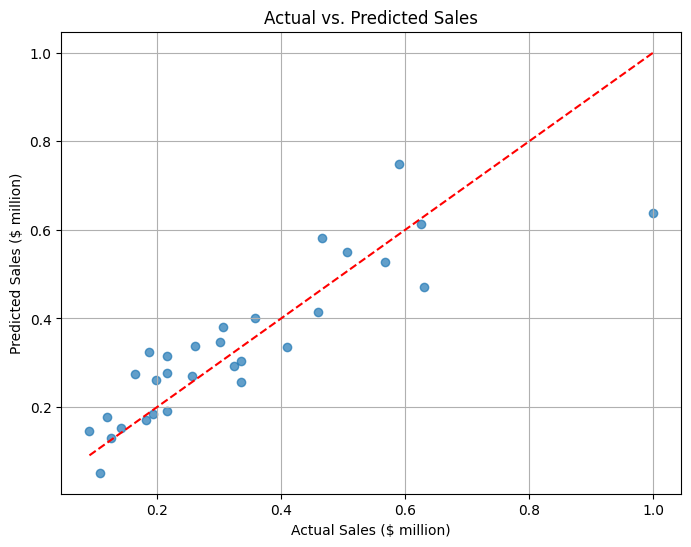

In [12]:
#  Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Sales ($ million)')
plt.ylabel('Predicted Sales ($ million)')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

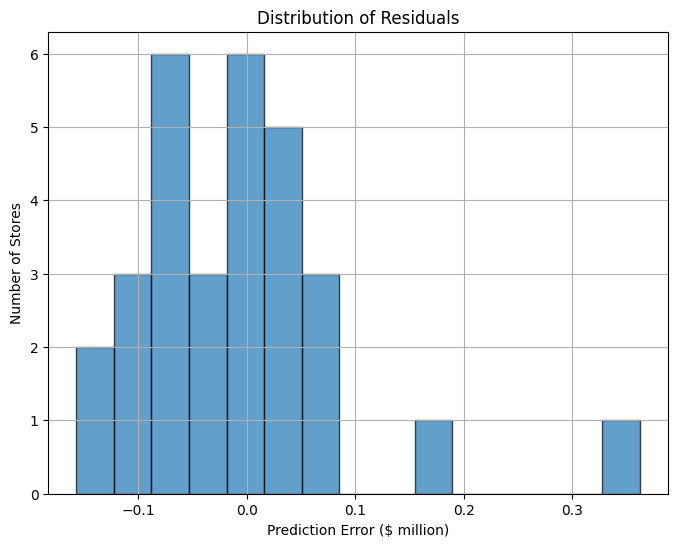

In [13]:
#  Histogram: Distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error ($ million)')
plt.ylabel('Number of Stores')
plt.grid(True)
plt.show()

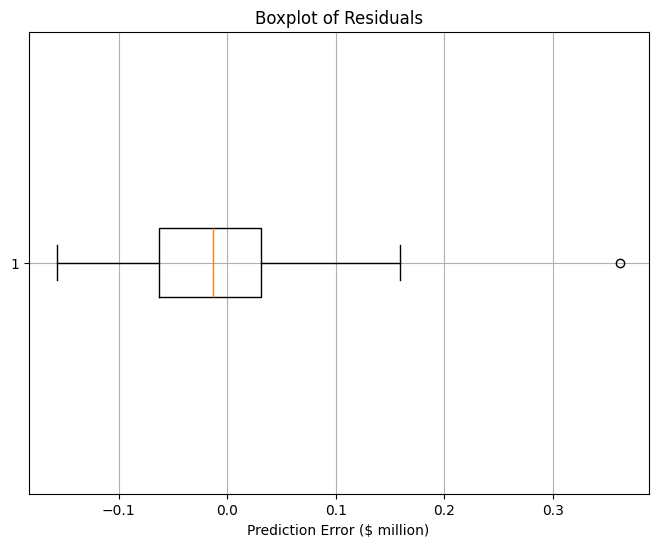

In [14]:
# Boxplot: Residuals
plt.figure(figsize=(8,6))
plt.boxplot(residuals, vert=False)
plt.title('Boxplot of Residuals')
plt.xlabel('Prediction Error ($ million)')
plt.grid(True)
plt.show()